<h1 style = "text-align: center; font-size: 48px;">MOVIE RATING PREDICTION WITH PYTHON<h1>

<h2>Introduction</h2>

<p>
Movies are without a doubt, an essential part of the modern age. Each Movie has a story to tell, an idea to share, or a case to defend.
This dataset is pulled from IMDb.com of all the Indian movies on the platform. <br>
Our task today will be to clean this data by different method, and to provide some usefull insight into how to the dataset is partitioned, accompagned by studying the relationship between different Features.
All of this will be assembled into what we call, A Data Preprocessing Pipeline. More on that later on.
</p>

<h2>Page Index</h2>
<ol>
    <li>Data collection</li>
    <li>Data processing</li>
    <li>Data visualization</li>
    <li>Model initialisation</li>
    <li>Valuation and optimization of the prediciton module</li>
</ol>

<h2>Data Collection</h2>

<h3>Source</h3>

The data has been collected from the famous website <i>Kaggle</i> which contains many usefull data set and informations.<br>
Link : <a href="https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies">IMDb India Movies</a>

<h3>Libraries</h3>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('Pandas version is : ', pd.__version__)
print('NumPy version is : ', np.__version__)
print('Seaborn version is : ', sns.__version__)
print('matplotlib version is : ', plt.matplotlib.__version__)

Pandas version is :  2.0.3
NumPy version is :  1.24.3
Seaborn version is :  0.12.2
matplotlib version is :  3.7.2


<h3>Importing the dataset</h3>

In [3]:
df = pd.read_csv('IMDb Movies India.csv')
pd.set_option('display.max_rows', 150)  # The maximum number of rows/entries allowed to display for each function.
pd.set_option('display.max_columns', 150)  # The maximum number of features/columns to display for each function.
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'twilight', 'twilight_shifted', 'cool', 'coolwarm', 'cividis', 'spring',
            'summer', 'autumn', 'winter', 'bone', 'copper', 'pink', 'spring_r', 'summer_r', 'autumn_r', 'winter_r',
            'PuBu', 'PuBuGn', 'BuPu', 'RdPu', 'PuRd', 'Oranges', 'YlOrBr', 'YlOrRd', 'OrRd', 'RdOrYl', 'YlGn', 'YlGnBu',
            'GnBu', 'BuGn', 'PuOr', 'BrBG', 'PRGn', 'PiYG', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'cubehelix',
            'husl', 'husl_r', 'hls', 'hls_r', 'gist_ncar', 'gist_ncar_r']

colors = ['#226F54', '#87C38F', '#F4F0BB']

In [4]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Understanding the dataset</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


<h3 style="text-align: center; color: #333;">Movie Rating Dataset Description</h3>
<p>In our dataset, we observe the following:</p>
<ol>
    <li>There are a total of <span style="font-weight: bold; color: #555;">15,509</span> entries/rows.</li>
    <li>Each movie entry includes <span style="font-weight: bold; color: #555;">10</span> different features:</li>
</ol>
<ul>
    <li><span style="font-weight: bold; color: #555;">Name</span>: The title of the movie (string value).</li>
    <li><span style="font-weight: bold; color: #555;">Year</span>: The year in which the movie was released (integer).</li>
    <li><span style="font-weight: bold; color: #555;">Duration</span>: The length of the movie in minutes (float).</li>
    <li><span style="font-weight: bold; color: #555;">Genre</span>: The genre of the movie (string).</li>
    <li><span style="font-weight: bold; color: #555;">Rating</span>: A rating on a scale from 0 to 10, indicating viewer satisfaction (float).</li>
    <li><span style="font-weight: bold; color: #555;">Votes</span>: The number of people who have rated the movie.</li>
    <li><span style="font-weight: bold; color: #555;">Director</span>: The director of the movie.</li>
    <li><span style="font-weight: bold; color: #555;">Actor 1</span>: The main actor of the movie.</li>
    <li><span style="font-weight: bold; color: #555;">Actor 2</span>: The second main actor of the movie.</li>
    <li><span style="font-weight: bold; color: #555;">Actor 3</span>: The third main actor of the movie.</li>
</ul>


<h2>Data Preprocessing</h2>

<p>
One of the most common way to handle any dataset in order to feed it to a prediction model or any sort of models, is to build what we call a 'Data Pipeline'.<br>
This will guide us into building a much cleaner and more presentable study case, and to ensure our models are as efficient and noise free as possible. <br>
    First, let's analyse in depth our dataset:
</p>

In [6]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Here we notice some intresting stuffs:<br>
    + 528 movies don't have their year of publishement.<br>
    + We are missing the duration for 8269 movies!.<br>
    + 1877 Movies are missing their genre.<br>
        .<br>
        .<br>
        .<br>
    <br>

We also notice that the Feature 'Genre' contains entries which consist of multiple genre, it's better to decompose each indivduals Genre into a Feature and reporesent the abscence of existance of a Genre by binary data: 1 for yes and 0 for no.

In [7]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


### Genres list

In [8]:
df_genre = df.copy()
df_genre.dropna(subset = 'Genre', axis = 0, inplace = True)
genres = []
genres = set(genre for genre_list in df_genre['Genre'].str.split(',') for genre in genre_list)
print(genres)

{'Mystery', 'Sci-Fi', 'Documentary', ' Musical', 'Romance', 'Biography', 'Adventure', 'Animation', ' Short', ' Comedy', 'Family', 'History', ' Horror', ' Adventure', ' Mystery', ' Family', 'Musical', ' Action', ' Music', 'Horror', ' War', ' Western', 'Thriller', ' Reality-TV', 'War', ' News', 'Action', 'Fantasy', ' Sci-Fi', ' History', ' Drama', ' Romance', ' Biography', ' Sport', ' Thriller', ' Fantasy', 'Sport', 'Reality-TV', 'Music', 'Crime', 'Comedy', 'Drama', ' Crime'}


### Preprocessing pipeline 

In [9]:
def imputate(dataset):
    '''Since we are looking to predict the rating of a movie, it's better to keep only rows with valid 'Rating' entries
    instead of just filling in with some variable.
    For the genre, we'll keep only the main genre of the film, suppossing that the first one in order is the main one.
    '''
    
    dataset.dropna(subset= ['Name', 'Year', 'Genre', 'Director', 'Rating', 'Actor 1', 'Actor 2', 'Actor 3'], axis = 0, inplace = True)
    
    

    # Here we are only keeping the main genre of the movie to ensure a proper training set.
    df['Genre'] = df['Genre'].str.split(',', expand=True)[0]

    dataset.dropna(subset = 'Genre', axis = 0 , inplace = True)
    
    dataset.reset_index(drop=True, inplace=True)
    return dataset


def reformat(dataset):
    # Remove parentheses from the 'Year' column and convert to integer
    dataset['Year'] = dataset['Year'].str.strip('()').astype(int)
    dataset['Duration'] = dataset['Duration'].str.rstrip(' min').astype(float)
    dataset['Rating'] = dataset['Rating'].astype(float)
    dataset['Votes'] = dataset['Votes'].astype(float)
    
    # Missing values
    columns = ['Year', 'Duration', 'Rating', 'Votes']
    
    for a in columns:
        dataset[a].fillna(dataset[a].mean(), inplace = True)
    
    # Reseting the index of rows in the datset
    dataset.reset_index(drop=True, inplace=True)
    return dataset


def preprocessing(dataset):
    
    imputate(dataset)
    reformat(dataset)
    
    X = dataset.drop('Rating', axis = 1)
    Y = dataset['Rating']
    return X, Y


In [10]:
preprocessing(df)

(                                    Name  Year    Duration   Genre   Votes  \
 0     #Gadhvi (He thought he was Gandhi)  2019  109.000000   Drama     8.0   
 1                                #Yaaram  2019  110.000000  Comedy    35.0   
 2                   ...Aur Pyaar Ho Gaya  1997  147.000000  Comedy   827.0   
 3                              ...Yahaan  2005  142.000000   Drama  1086.0   
 4                     ?: A Question Mark  2012   82.000000  Horror   326.0   
 ...                                  ...   ...         ...     ...     ...   
 7553                     Zulm Ki Hukumat  1992  133.439124  Action   135.0   
 7554                     Zulm Ki Zanjeer  1989  125.000000  Action    44.0   
 7555                 Zulm Ko Jala Doonga  1988  133.439124  Action    11.0   
 7556                               Zulmi  1999  129.000000  Action   655.0   
 7557                        Zulm-O-Sitam  1998  130.000000  Action    20.0   
 
                Director           Actor 1        

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7558 entries, 0 to 7557
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   float64
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 590.6+ KB


### Data's Format

In [12]:
for a in df.columns:
    column_format = df[a].apply(lambda x: type(x)).unique()

    if len(column_format) == 1:
        print(f"All values in the '{a}' column have the same format: {column_format[0]}")
    else:
        print(f"Values in the '{a}' column have different formats: {column_format}")

All values in the 'Name' column have the same format: <class 'str'>
All values in the 'Year' column have the same format: <class 'int'>
All values in the 'Duration' column have the same format: <class 'float'>
All values in the 'Genre' column have the same format: <class 'str'>
All values in the 'Rating' column have the same format: <class 'float'>
All values in the 'Votes' column have the same format: <class 'float'>
All values in the 'Director' column have the same format: <class 'str'>
All values in the 'Actor 1' column have the same format: <class 'str'>
All values in the 'Actor 2' column have the same format: <class 'str'>
All values in the 'Actor 3' column have the same format: <class 'str'>


<br>
<p>Here we notice that some entries for Feature `Actor 2` and `Actor 3` have different formats, that is because some entries are missing and the missing values `NaN` is considered as a `float` variable.</p>
To verify this, we can use the following command :

In [13]:
print('String entries in `Actor 2` : \n', df[df['Actor 2'].apply(lambda x: isinstance(x, str))])

String entries in `Actor 2` : 
                                     Name  Year    Duration   Genre  Rating  \
0     #Gadhvi (He thought he was Gandhi)  2019  109.000000   Drama     7.0   
1                                #Yaaram  2019  110.000000  Comedy     4.4   
2                   ...Aur Pyaar Ho Gaya  1997  147.000000  Comedy     4.7   
3                              ...Yahaan  2005  142.000000   Drama     7.4   
4                     ?: A Question Mark  2012   82.000000  Horror     5.6   
...                                  ...   ...         ...     ...     ...   
7553                     Zulm Ki Hukumat  1992  133.439124  Action     5.3   
7554                     Zulm Ki Zanjeer  1989  125.000000  Action     5.8   
7555                 Zulm Ko Jala Doonga  1988  133.439124  Action     4.6   
7556                               Zulmi  1999  129.000000  Action     4.5   
7557                        Zulm-O-Sitam  1998  130.000000  Action     6.2   

       Votes           Director

### Check for duplicate

In [14]:
print('Number for duplicated entries is : ', df.duplicated().sum())

Number for duplicated entries is :  0


<h2 style="padding : 8px; text-align: center;"> Quick summary of preprocessing:</h2>

We performed many steps, here's a quick recap:
 - **Dealing with missing values**: We detected many missing values from the dataset, that's why we decided to drop some and fill the other. Since we are looking to predict the Rating of movies, we decided to only keep the valid rows to secure the integrity of our dataset. Next, we modified the Genre Feature such that we only maintain one main genre of the movie, and not three.
 - **Data format**: We made sure that each value for the 'Duration' and 'Year' Feature were formatted correctly.
 - **Artist**: we dropped rows in which the first artist or the main actor is missing.

<h2 style ="text-align : center">Statistics</h2>

### Univariant analyse:

In [15]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110.000000,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147.000000,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142.000000,Drama,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82.000000,Horror,5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
7553,Zulm Ki Hukumat,1992,133.439124,Action,5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7554,Zulm Ki Zanjeer,1989,125.000000,Action,5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7555,Zulm Ko Jala Doonga,1988,133.439124,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7556,Zulmi,1999,129.000000,Action,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


#### Most casted Actor in the dataset:

<p style = "text-align : center; margin : auto; width : fit-content; font-size : 16px;">
    Distribution of Actors 
    </p>

##### Artist 1

In [16]:
artist1_grouped = df.groupby('Actor 1').size().reset_index(name='Count')
artist1_grouped

,Actor 1,Count
0,A. Muthu,1
1,A. Nairang,1
2,A.K. Hangal,1
3,A.K. Misra,1
4,A.S. Ravindra Babu,1
...,...,...
2410,Zarina Wahab,1
2411,Zayed Khan,4
2412,Zeenat Aman,14
2413,Zenia Starr,2


In [17]:
df['Actor 1'].describe()

count          7558
unique         2415
top       Jeetendra
freq            140
Name: Actor 1, dtype: object

We conclude that the actor `Jeetendra` has been casted the most times as the main characters, which is 140 times.

##### Actor 2

In [18]:
artist2_grouped = df.groupby('Actor 2').size().reset_index(name='Count')
artist2_grouped

,Actor 2,Count
0,A.H. Shore,1
1,A.K. Hangal,2
2,Aachi Manorama,2
3,Aadil Khan,1
4,Aahana Kumra,1
...,...,...
2778,Zoa Morani,1
2779,Zoya Afroz,2
2780,Zoya Hussain,1
2781,Zubeida,1


In [19]:
df['Actor 2'].describe()

count      7558
unique     2783
top       Rekha
freq         79
Name: Actor 2, dtype: object

We conclude that the actor `Reckha` has been casted the most times as the main characters, which is 79 times.

##### Actor 3

In [20]:
artist3_grouped = df.groupby('Actor 3').size().reset_index(name='Count')
artist3_grouped

,Actor 3,Count
0,A.K. Agnihotri,1
1,A.K. Hangal,4
2,Aabid Shamim,1
3,Aachi Manorama,3
4,Aadi,1
...,...,...
3026,Zeishan Quadri,1
3027,Zenobia Shroff,1
3028,Zohra,1
3029,Zoya Hussain,2


In [21]:
df['Actor 3'].describe()

count     7558
unique    3031
top       Pran
freq        74
Name: Actor 3, dtype: object

Note: The statistics provided above ansewrs the following questions :
 - Who was the most casted as the main character ? 
 - Who was the most casted as the second main character ? 
 - Who was the most caster as the third main characters ?
 

We conclude that the actor `Pran` has been casted the most times as the main characters, which is 74 times.

#### The most casted actor regardless of role

In [22]:
def high_actor(dataset):
    '''This functions allows us to calculate how many times an actor has stared in a movie, regardles of his role'''
    
    # Extracting a subset.
    actors = dataset[['Actor 1', 'Actor 2', 'Actor 3']].values
    dict_actor = {}
    
    for row in actors:
        for actor in row:
            if pd.notnull(actor):  
                # Check if the actor is not NaN
                if actor in dict_actor:
                    dict_actor[actor] += 1
                else:
                    dict_actor[actor] = 1
                    
    '''Now since we calculated our values and stored them into a data strucutre of 
    type dictionnary, we can use the max function to find our actor.'''
    return max(dict_actor, key=lambda k: dict_actor[k])

In [23]:
result = high_actor(df)
print('Our most casted Actor is: ', result)

Our most casted Actor is:  Mithun Chakraborty


In [24]:
actor_counts = [df['Actor 1'].value_counts().get('Mithun Chakraborty', 0),
                df['Actor 2'].value_counts().get('Mithun Chakraborty', 0),
                df['Actor 3'].value_counts().get('Mithun Chakraborty', 0)]

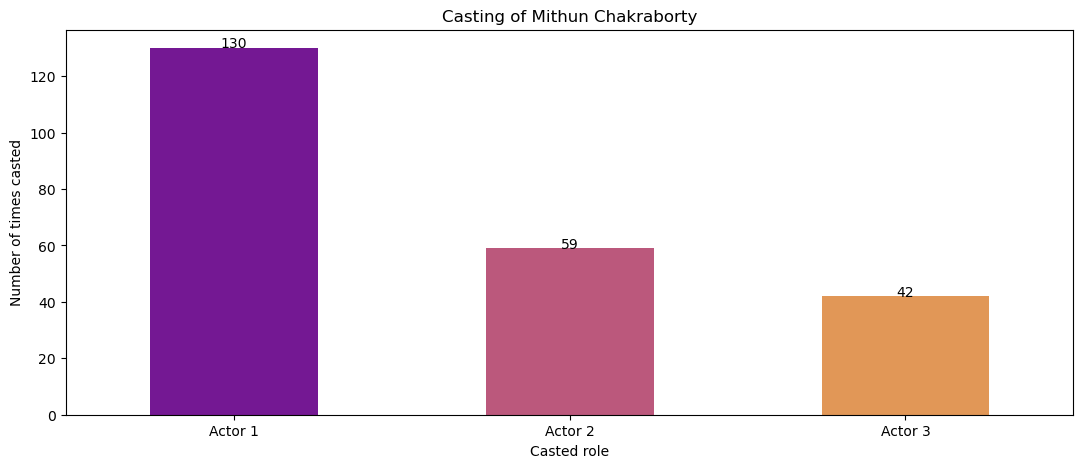

In [25]:
plt.figure(figsize=(13, 5))

barplot = sns.barplot(x=['Actor 1', 'Actor 2', 'Actor 3'], y=actor_counts, palette=palettes[2], width = 0.5)

for index, value in enumerate(actor_counts):
    barplot.text(index, value + 0.1, str(value), ha='center')

plt.xlabel('Casted role')
plt.ylabel('Number of times casted')
plt.title('Casting of Mithun Chakraborty')
plt.show()

#### Ratings:

In [26]:
df['Rating'].describe()

count    7558.000000
mean        5.811127
std         1.368255
min         1.100000
25%         4.900000
50%         6.000000
75%         6.800000
max        10.000000
Name: Rating, dtype: float64


- **Count:** 7707 non-null values
- **Mean:** Approximately 5.82
- **Standard Deviation:** Approximately 1.37
- **Min:** 1.1
- **25th Percentile:** Approximately 4.9
- **Median (50th Percentile):** Approximately 6.0
- **75th Percentile:** Approximately 6.8
- **Max:** 10.0

##### Highest rating: 

In [27]:
df[df['Rating'] == 10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4179,Love Qubool Hai,2020,94.0,Drama,10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


##### Lowest rating:

In [28]:
df[df['Rating'] == 1.1]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5961,Sadak 2,2020,133.0,Action,1.1,67785.0,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


####  Votes:

In [29]:
df['Votes'].describe()

count      7558.000000
mean       2029.123842
std       11868.695754
min           5.000000
25%          18.000000
50%          61.000000
75%         456.000000
max      591417.000000
Name: Votes, dtype: float64

- **Count:** Indicates the number of entries in the column, which is 7,707.
- **Mean:** Represents the average value of the 'Votes' across all entries, which is approximately 1,991.02.
- **Standard Deviation:** Shows the measure of the amount of variation or dispersion in the 'Votes' values. A higher standard deviation indicates greater variability among the values.
- **Minimum:** Denotes the smallest value in the 'Votes' column, which is 5.
- **25th Percentile:** This value indicates that 25% of the 'Votes' entries are less than or equal to 17.
- **Median (50th Percentile):** Also known as the median, it represents the middle value in the sorted 'Votes' data. Half of the entries have 'Votes' values below 59, and the other half have values above 59.
- **75th Percentile:** This value indicates that 75% of the 'Votes' entries are less than or equal to 435.
- **Maximum:** Denotes the largest value in the 'Votes' column, which is 591,417.

##### Most votes:

In [30]:
df[df['Votes'] == 591417]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4105,Life of Pi,2012,127.0,Adventure,7.9,591417.0,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain


##### Lowest votes:

In [31]:
df[df['Votes'] == 5]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
116,Aabshar,1953,133.439124,Drama,5.0,5.0,Hasrat Lucknowi,Iftekhar,Kuldip Kaur,Raaj Kumar
160,Aaina,1944,133.439124,Drama,3.2,5.0,S.M. Yusuf,Husn Banu,Sulochana Chatterjee,Gope
188,Aakhir Kaun Thi Woh?,2000,133.439124,Action,4.4,5.0,Bapu,Raj Babbar,Raza Murad,Sripradha
221,Aan Baan,1956,133.439124,Romance,2.8,5.0,D.D. Kashyap,Ajit,Nalini Jaywant,Mahipal
234,Aangan Ki Kali,1979,133.439124,Drama,5.6,5.0,Harsh Kohli,Rakesh Roshan,Lakshmi,Prema Narayan
397,Agra Road,1957,133.439124,Comedy,4.8,5.0,Ravindra Dave,Shakila,Vijay Anand,Nanda
436,Akalmand,1966,133.439124,Comedy,7.4,5.0,Sev Anand,I.S. Johar,Kishore Kumar,Sonia Sahni
587,Ankh Micholi,1962,133.439124,Crime,5.2,5.0,Ravindra Dave,Shekhar,Mala Sinha,S. Nazir
597,Anmol Sitaare,1982,153.000000,Drama,7.0,5.0,Geethapriya,Master Baboo,Rakesh Bedi,Ramesh Deo
647,Apna Banake Dekho,1962,133.439124,Romance,5.6,5.0,Jagdish Nirula,Asha Parekh,Manoj Kumar,Mohan Choti


#### Year : 

In [32]:
df['Year'].describe()

count    7558.000000
mean     1993.421011
std        20.004711
min      1917.000000
25%      1980.000000
50%      1996.000000
75%      2011.000000
max      2021.000000
Name: Year, dtype: float64

- **Count:** Indicates the total number of entries in the 'Year' column, which is 7,707.
- **Mean:** Represents the average year, calculated as approximately 1993.65.
- **Standard Deviation:** Measures the dispersion or spread of the data around the mean, which is approximately 19.99.
- **Minimum:** Shows the earliest year in the dataset, which is 1917.
- **25th Percentile:** Specifies the year below which 25% of the data falls, which is 1980.
- **Median (50th Percentile):** Represents the middle value of the dataset when arranged in ascending order, which is 1997.
- **75th Percentile:** Indicates the year below which 75% of the data falls, which is 2011.
- **Maximum:** Shows the most recent year in the dataset, which is 2021.

##### Oldest Movie:

In [33]:
df[df['Year'] == 1917]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4065,Lanka Dahan,1917,133.439124,Adventure,6.7,22.0,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke


##### Latest Movies:

In [34]:
df[df['Year'] == 2021]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
13,12 O'Clock,2021,105.000000,Horror,4.4,63.0,Ram Gopal Varma,Mithun Chakraborty,Makrand Deshpande,Dalip Tahil
84,8119 Miles,2021,115.000000,Adventure,6.6,21.0,Joe Eshwar,Ranji Vijayan,Kuriakose Oonnittan,Guy Bleyaert
423,Ajeeb Daastaans,2021,142.000000,Drama,6.7,4133.0,Neeraj Ghaywan,Kayoze Irani,Shashank Khaitan,Raj Mehta
515,Ammaa Ki Boli,2021,117.000000,Comedy,8.1,871.0,Narayan Chauhan,Sanjay Mishra,Hrishitaa Bhatt,Master Aniket
625,Antenna,2021,84.000000,Drama,7.1,7.0,Shoib Nikash Shah,Imran Khan,Imran Khan,Azmat Khwaja
784,B.A. Pass 3,2021,136.000000,Drama,8.3,1877.0,Narendra Singh,Sunny Sachdeva,Armaan Sandhu,Ankita Sahu
913,Baikunth,2021,72.000000,Family,9.3,29.0,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
968,Bansuri: The Flute,2021,108.000000,Drama,3.7,7.0,Hari Viswanath,Anurag Kashyap,Rituparna Sengupta,Upendra Limaye
1008,Bawri Chhori,2021,133.439124,Drama,5.2,79.0,Akhilesh Jaiswal,Sagar Arya,Amerjit Deu,Apurva Gondalia
1225,Black Rose,2021,133.439124,Thriller,5.0,46.0,Hemant N Mishra,Samiksha Bhatnagar,Abhilash Narain,Sanjana Shukla


#### Duration

In [35]:
df['Duration'].describe()

count    7558.000000
mean      133.439124
std        21.908841
min        21.000000
25%       125.000000
50%       133.439124
75%       144.000000
max       321.000000
Name: Duration, dtype: float64

- **Count:** Total number of entries in the 'Duration' column, which is 7,707.
- **Mean:** Average duration of movies, approximately 132.80 minutes.
- **Standard Deviation:** Measure of the dispersion of durations around the mean, approximately 22.36 minutes.
- **Minimum:** Shortest duration observed in the dataset, 21 minutes.
- **25th Percentile:** Duration below which 25% of movies fall, 124 minutes.
- **Median (50th Percentile):** Middle value of the dataset, 132.80 minutes.
- **75th Percentile:** Duration below which 75% of movies fall, 144 minutes.
- **Maximum:** Longest duration observed in the dataset, 321 minutes.

##### Longest movie

In [36]:
df[df['Duration'] == 321]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
2462,Gangs of Wasseypur,2012,321.0,Action,8.2,86355.0,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui


##### Shortest movie:

In [37]:
df[df['Duration'] == 21]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5414,Pratibimbo,2020,21.0,Crime,7.8,8.0,Yogesh Ingole,Moumita Goswami,Priyanka Karkera,Abhishail Kharote


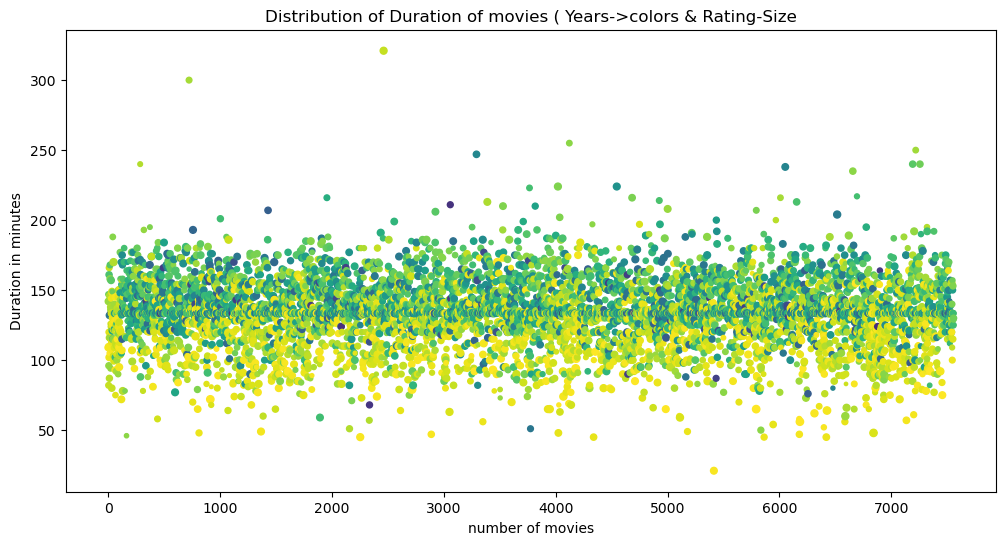

In [38]:
plt.figure(figsize = (12,6))

plt.scatter(df.index,df['Duration'], c = df['Year'], s = df['Rating']*3)

plt.ylabel('Duration in minutes')
plt.xlabel('number of movies')
plt.title('Distribution of Duration of movies ( Years->colors & Rating-Size')


plt.show()


#### Genre:

In [39]:
df['Genre'].describe()

count      7558
unique       20
top       Drama
freq       2481
Name: Genre, dtype: object

The 'Genre' column contains `7707` entries, with `20` unique genres. The most frequently occurring genre is `Drama`, which appears `2523` times.

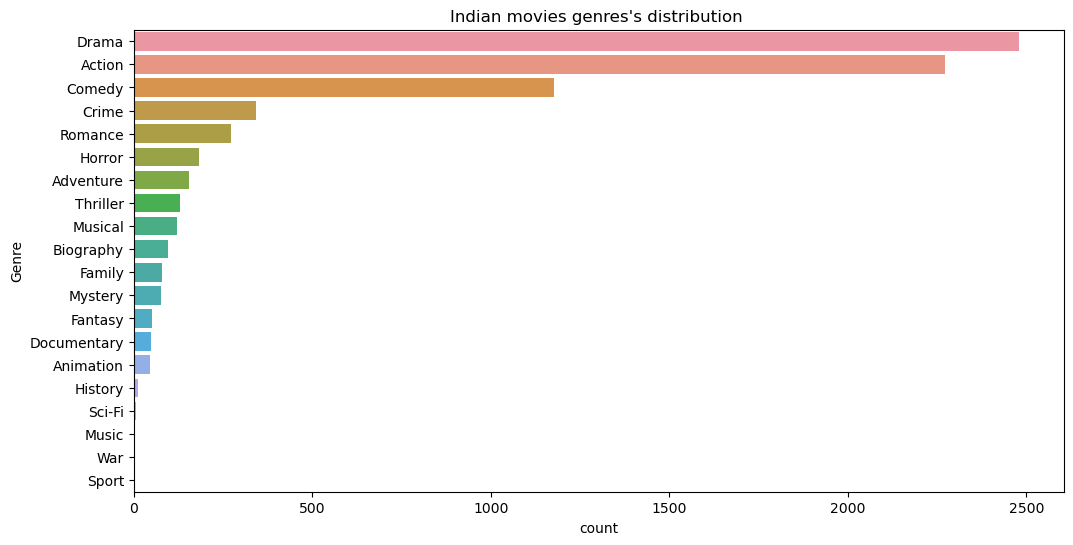

In [40]:
plt.figure(figsize = (12,6) )

df_genre = df['Genre'].value_counts()
barplot = sns.barplot(x = df_genre, y = df_genre.index)

plt.title("Indian movies genres's distribution ")
plt.show()

#### Director:

In [41]:
df['Director'].describe()

count             7558
unique            2956
top       Mahesh Bhatt
freq                45
Name: Director, dtype: object

The Director feature has `7707` entries. Among these entries, there are `3048` unique directors. The director who appears most frequently in the dataset is `Mahesh Bhatt`, with `46` occurrences.

In [42]:
print(df['Director'].value_counts())

Director
Mahesh Bhatt            45
David Dhawan            43
Hrishikesh Mukherjee    42
Shakti Samanta          38
Kanti Shah              37
                        ..
Vibhu Puri               1
Partho Sen-Gupta         1
Sanjeev Kumar Rajput     1
Gautam Bhatia            1
Mozez Singh              1
Name: count, Length: 2956, dtype: int64


    From our traitements, we notice that the director `Mahesh Bhatt` is the one who directed the most movies in our dataset, followed by `David Dhawan`and `Hrishikesh Mukherjee`

### Multivariants analysis:

#### Year and Rating:

Goal : On average, what's the year that had the best rating for movies ?

In [43]:
year_rating = df[['Year', 'Rating']]

rating_count = year_rating.groupby('Year').sum().sort_index()  # DataFrame with sum of ratings per year
movie_count = year_rating['Year'].value_counts().sort_index()  # Series with count of movies per year

avg_rating = round(rating_count['Rating'] / movie_count, ndigits = 2)  # Calculate average rating per year
avg_rating = pd.DataFrame(avg_rating)

    Here is the average rating of movies per year 

In [44]:
avg_rating.T

Year,1917,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,6.7,5.9,5.75,5.55,5.6,5.5,5.89,6.03,6.56,5.98,7.05,6.53,6.61,6.76,5.98,6.07,6.3,6.35,7.14,6.83,7.03,6.68,6.94,6.82,6.36,6.79,6.36,6.78,6.41,6.44,6.45,6.41,6.33,6.36,6.41,6.55,6.46,6.57,6.52,6.37,6.45,6.45,6.22,6.28,6.57,6.39,6.45,6.23,6.34,6.33,6.06,6.24,6.09,6.21,5.97,6.01,5.94,5.66,5.58,5.34,5.19,5.13,5.45,5.32,5.19,5.06,5.25,5.35,5.2,5.38,5.05,5.23,5.03,5.16,5.11,5.26,5.31,5.52,5.23,5.41,5.35,5.42,5.58,5.67,5.55,5.82,5.88,5.99,6.19,6.27,6.25,6.47


In [45]:
avg_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
0,92.0,6.023913,0.562778,5.03,5.515,6.14,6.45,7.14


- **count**: This indicates the number of non-null observations, which in this case is 92. It tells us how many years' worth of data we have for calculating average ratings.
- **mean**: The mean, or average, rating across all the years. In this case, it's approximately 6.03. It gives us a measure of the central tendency of the ratings distribution.
- **std**: The standard deviation measures the dispersion or spread of the ratings from the mean. A lower standard deviation indicates that the ratings are clustered closely around the mean, while a higher standard deviation suggests more variability. Here, it's about 0.55, indicating moderate variability in the ratings.
- **min**: This is the lowest rating observed across all the years, which is 5.05. It gives us insight into the lowest point of the rating scale.
- **25% (first quartile)**: This represents the value below which 25% of the ratings fall. It's also known as the 25th percentile. In this case, it's around 5.52, indicating that a quarter of the ratings are below this value.
- **50% (median)**: This is the middle value of the ratings distribution, also known as the median or the 50th percentile. Half of the ratings are above this value and half are below. Here, it's approximately 6.15.
- **75% (third quartile)**: Similar to the first quartile, this represents the value below which 75% of the ratings fall. It's the 75th percentile of the distribution. In this case, it's around 6.45, indicating that three-quarters of the ratings are below this value.
- **max**: This is the highest rating observed across all the years, which is 7.14. It provides insight into the highest point of the rating scale, showing the upper limit of the ratings distribution.

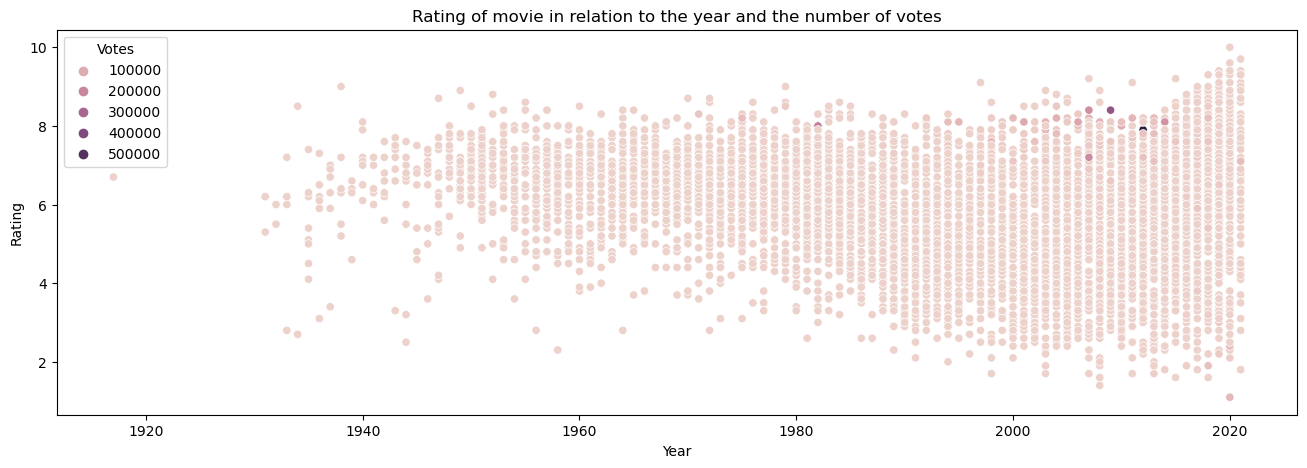

In [46]:
plt.figure(figsize = (16,5))

sns.scatterplot(x=df['Year'],y=df['Rating'], hue = df['Votes'])

plt.title("Rating of movie in relation to the year and the number of votes")

plt.show()

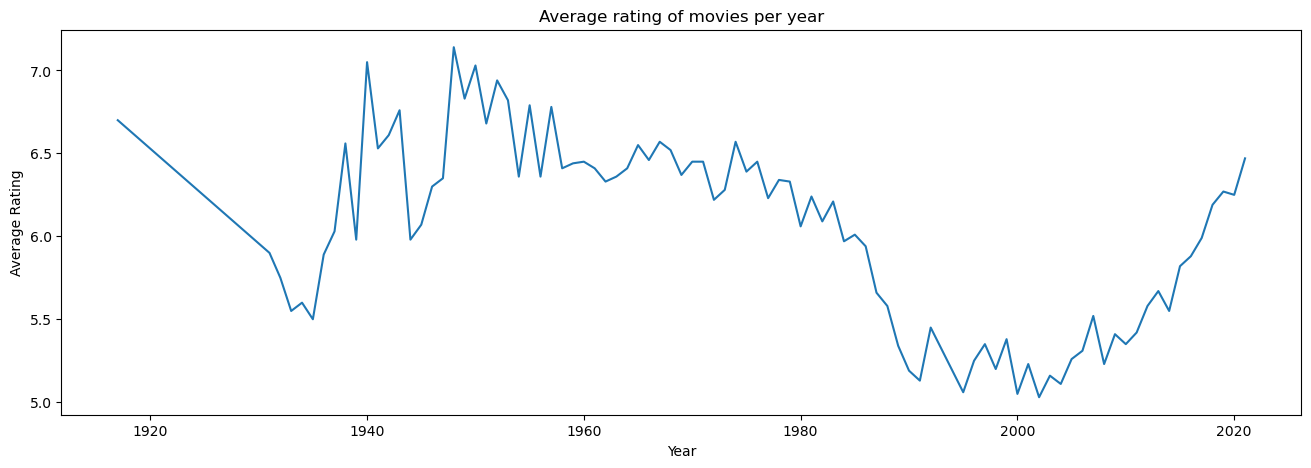

In [47]:
plt.figure(figsize=(16, 5))
sns.lineplot(x=avg_rating.index, y=avg_rating[0].values)
plt.title('Average rating of movies per year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

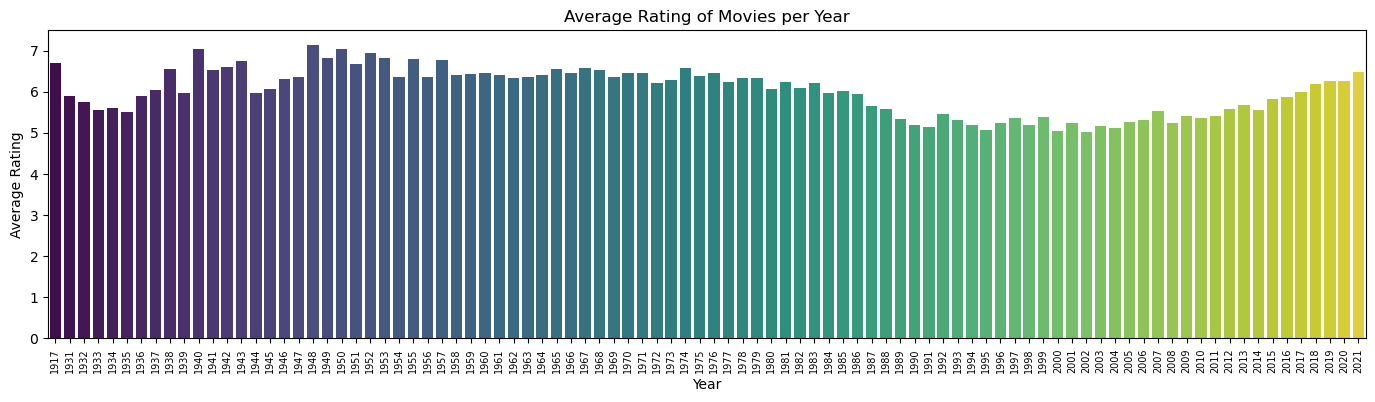

In [48]:
plt.figure(figsize=(17, 4))
barplot = sns.barplot(x=avg_rating.index, y=avg_rating[0].values, palette='viridis')
barplot.set_title('Average Rating of Movies per Year')
barplot.set_xlabel('Year')
barplot.set_ylabel('Average Rating')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, fontsize=7)
plt.show()

<h5 style = 'text-align : center; font-size : 20'>Observations</h5>

    Since we calculated the average rating of movies per years, we noticed some intresting facts:
- The 1949 - 1958 period witnessed the highest amount of rating for movies, where the highest rating was around 7.14/10 per movie on 1948.
- The period that witnessed the lowest rating on average for movies was between the year 1991 to 2007.
- The year 2000 witnessed the lowest rating for movies on average of number of movies released in that year

#### Duration and Rating

In [49]:
duration_rating = df[subset := ['Duration','Rating']]
duration_rating.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501,7502,7503,7504,7505,7506,7507,7508,7509,7510,7511,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531,7532,7533,7534,7535,7536,7537,7538,7539,7540,7541,7542,7543,7544,7545,7546,7547,7548,7549,7550,7551,7552,7553,7554,7555,7556,7557
Duration,109.0,110.0,147.0,142.0,82.0,116.0,96.0,120.0,161.0,166.0,102.0,87.0,132.0,105.0,116.0,146.0,116.0,168.0,158.0,126.0,133.439124,94.0,138.0,120.0,124.0,144.0,157.0,136.0,107.0,113.0,133.439124,133.439124,80.0,122.0,149.0,148.0,149.0,130.0,124.0,121.0,126.0,188.0,133.439124,115.0,103.0,114.0,115.0,122.0,170.0,133.439124,100.0,99.0,133.439124,133.439124,109.0,133.439124,140.0,122.0,133.439124,128.0,93.0,102.0,125.0,145.0,121.0,75.0,133.439124,113.0,111.0,134.0,133.439124,110.0,104.0,92.0,136.0,...,169.0,162.0,127.0,175.0,154.0,172.0,133.439124,133.439124,154.0,134.0,133.0,133.439124,136.0,137.0,133.439124,166.0,145.0,133.439124,137.0,168.0,115.0,149.0,140.0,141.0,133.439124,132.0,131.0,164.0,133.439124,129.0,126.0,150.0,170.0,133.439124,142.0,142.0,136.0,133.439124,116.0,125.0,112.0,131.0,133.439124,157.0,120.0,139.0,118.0,130.0,133.439124,134.0,133.439124,120.0,117.0,133.439124,126.0,155.0,120.0,120.0,133.439124,140.0,133.439124,109.0,100.0,133.439124,157.0,133.439124,150.0,115.0,153.0,133.439124,133.439124,125.0,133.439124,129.0,130.0
Rating,7.0,4.4,4.7,7.4,5.6,4.0,6.2,5.9,6.5,5.7,7.4,6.3,7.2,4.4,6.6,7.3,7.1,5.6,6.9,3.5,5.000000,4.5,6.4,4.1,4.8,4.5,7.2,8.1,4.0,5.5,7.300000,5.600000,6.8,5.0,6.9,6.2,3.5,6.1,6.1,7.7,6.1,5.1,3.100000,6.9,5.0,3.3,7.8,6.9,8.4,5.200000,6.9,4.3,5.000000,4.800000,5.8,4.600000,5.7,7.5,6.700000,5.7,5.6,5.6,3.6,6.3,7.3,4.8,3.900000,7.8,5.7,6.5,6.500000,4.6,4.2,6.2,5.3,...,6.0,4.9,3.8,6.8,6.3,5.5,6.300000,4.600000,5.3,6.0,5.5,5.900000,6.2,3.0,3.700000,3.3,7.6,6.000000,3.2,7.6,6.3,7.7,6.4,6.4,6.800000,5.4,7.1,5.4,6.700000,4.7,4.4,6.9,5.8,7.800000,3.6,4.8,5.3,3.000000,4.9,7.1,3.9,7.1,4.000000,6.5,7.0,6.8,2.8,2.7,6.900000,6.0,5.400000,8.2,3.7,6.800000,5.5,8.2,4.4,6.0,6.300000,5.7,6.500000,4.0,5.7,6.100000,4.3,4.700000,5.6,6.1,6.2,4.900000,5.300000,5.8,4.600000,4.5,6.2


    It's very common for different movies to have the same duration, let's count them

In [50]:
print('The number of movies that shares the same length is : ', duration_rating.duplicated(subset = ['Duration'], keep = False).sum(), 'Movies')

The number of movies that shares the same length is :  7532 Movies


    It's also very common to share the same rating

In [51]:
print('The number of movies that share the same rating is : ', duration_rating.duplicated(subset = ['Rating'], keep = False).sum(), 'Movies')

The number of movies that share the same rating is :  7553 Movies


    To better analyse the relationship between the movie's duration and the rating, we could group them by some criteria. This way, we'll have the average rating of movies and durations

In [52]:
# Rating for movie grouped by their duration

dr_rt = duration_rating.groupby('Duration')
describe_dr_rt = dr_rt.describe()['Rating']
describe_dr_rt.T

Duration,21.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,...,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,195.0,197.0,199.0,200.0,201.0,202.0,204.0,206.0,207.0,208.0,210.0,211.0,213.0,214.0,216.0,217.0,223.0,224.0,235.0,238.0,240.0,247.0,250.0,255.0,300.0,321.0
count,1.0,4.000000,1.0,2.000000,3.000000,2.000000,1.0,2.000000,1.0,1.0,3.000000,2.00000,2.000000,2.000000,3.000000,1.0,1.0,2.000000,3.000000,8.000000,2.000000,1.0,6.000000,1.0,3.000000,1.0,4.000000,5.000000,5.000000,6.000000,3.000000,9.000000,8.000000,9.000000,15.000000,4.000000,13.000000,12.000000,10.000000,19.000000,9.000000,14.000000,16.000000,14.000000,55.000000,15.000000,28.0000,24.000000,19.000000,44.000000,27.000000,34.000000,28.000000,24.000000,64.000000,26.000000,37.000000,29.000000,41.000000,49.000000,42.000000,43.000000,44.000000,45.000000,81.000000,28.000000,47.000000,46.000000,43.000000,57.000000,44.000000,61.000000,44.000000,51.000000,169.000000,...,116.000000,80.000000,47.000000,75.000000,65.000000,133.000000,58.000000,73.000000,77.000000,56.000000,92.000000,57.000000,51.000000,53.000000,41.000000,86.000000,43.000000,52.000000,37.000000,45.000000,53.000000,28.000000,20.00000,33.000000,27.000000,39.000000,31.000000,24.000000,25.000000,19.000000,29.000000,12.00000,15.000000,11.000000,5.000000,43.00000,6.000000,3.000000,4.000000,7.000000,7.000000,10.00000,8.000000,7.000000,4.000000,5.00000,2.000000,4.000000,5.000000,4.000000,3.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,2.00000,1.0,2.000000,1.0,2.000000,1.0,3.000000,1.0,1.0,2.000000,1.0,1.0,3.000000,1.0,1.0,1.0,1.0,1.0
mean,7.8,7.075000,3.1,6.550000,7.500000,6.900000,6.1,5.950000,4.5,6.9,7.166667,6.35000,4.800000,8.050000,6.466667,6.0,8.5,7.550000,7.166667,7.075000,7.350000,5.2,5.583333,6.1,6.533333,5.7,7.925000,6.160000,7.320000,6.566667,6.033333,6.311111,5.587500,6.077778,6.526667,5.550000,6.123077,5.816667,6.370000,6.557895,5.988889,5.942857,6.256250,6.092857,5.914545,6.473333,6.5000,5.825000,6.542105,6.009091,6.359259,5.694118,5.732143,5.845833,6.075000,6.380769,5.764865,5.689655,6.060976,6.059184,5.904762,5.883721,5.309091,5.615556,5.696296,5.707143,5.651064,5.882609,6.039535,5.771930,6.118182,5.822951,5.500000,5.498039,6.024260,...,5.748276,5.798750,5.908511,5.856000,5.866154,5.911278,5.850000,5.668493,5.970130,6.191071,5.897826,5.889474,5.992157,5.860377,5.885366,5.753488,6.046512,5.825000,6.059459,6.142222,5.869811,6.157143,6.23500,6.051515,5.811111,6.294872,6.132258,5.970833,6.296000,6.294737,6.562069,6.92500,6.613333,6.500000,6.560000,4.95814,7.150000,6.033333,7.300000,6.471429,6.457143,7.27000,6.287500,6.114286,7.075000,5.48000,7.500000,6.850000,6.500000,4.975000,5.633333,6.800000,5.400000,6.3,6.7,8.5,7.5,6.15000,7.6,6.800000,6.0,7.200000,5.5,5.900000,4.2,5.2,8.050000,6.7,7.5,5.666667,7.0,5.2,5.2,5.6,8.2
std,NaN,0.838153,NaN,0.070711,1.571623,1.414214,NaN,0.212132,NaN,NaN,1.847521,1.06066,0.989949,0.636396,1.975686,NaN,NaN,0.919239,1.847521,1.652487,0.919239,NaN,1.803792,NaN,1.285820,NaN,1.040433,1.947563,1.151955,1.245258,0.763763,1.128544,2.024449,1.809543,1.459680,2.212841,1.162722,1.712432,1.089393,1.467544,1.169877,0.992831,1.130173,1.749929,1.535436,1.267431,1.3325,1.927885,1.483358,1.502063,1.377081,1.640203,1.359753,1.650027,1.535816,1.361182,1.695782,1.200103,1.703655,1.498599,1.409541,1.452245,1.460777,1.539917,1.395300,1.667539,1.614859,1.757309,1.416424,1.333866,1.492816,1.482947,1.652623,1.449895,1.399

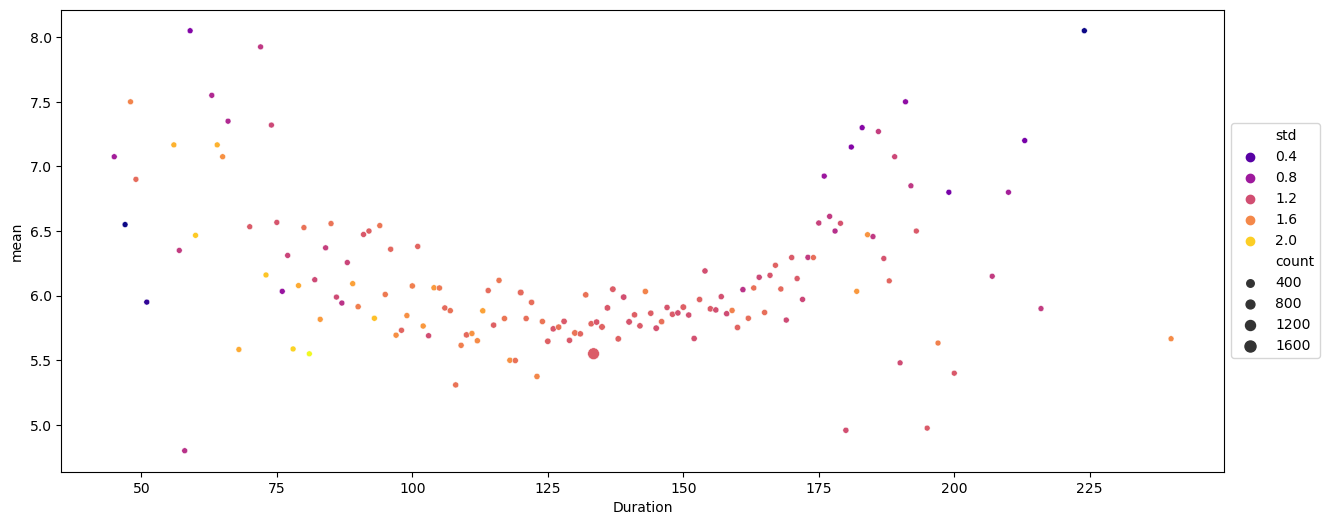

In [53]:
plt.figure(figsize = (15,6))
sns.scatterplot(describe_dr_rt, x = 'Duration', y = 'mean', size ='count', hue='std', palette = palettes[2])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [54]:
# Duration of movies grouped by their 
rt_dr = duration_rating.groupby('Rating')
describe_rt_dr = rt_dr.describe()['Duration']
describe_rt_dr.T

Rating,1.1,1.4,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3,9.4,9.6,9.7,10.0
count,1.0,1.0,3.000000,5.000000,4.000000,6.000000,3.000000,8.000000,5.000000,13.000000,17.000000,27.000000,20.000000,31.000000,30.000000,31.000000,23.000000,42.000000,49.000000,65.000000,53.000000,63.000000,72.000000,74.000000,78.000000,74.000000,77.000000,91.000000,118.000000,112.000000,124.000000,117.000000,136.000000,125.000000,150.000000,145.000000,149.000000,165.000000,137.000000,167.000000,202.000000,163.000000,193.000000,195.000000,198.000000,168.000000,211.000000,206.000000,259.000000,204.000000,206.000000,246.000000,223.000000,220.000000,251.000000,200.000000,189.000000,195.000000,190.000000,152.000000,136.000000,111.000000,112.000000,79.000000,74.000000,61.000000,65.000000,55.000000,47.000000,23.000000,20.000000,14.000000,22.000000,12.000000,8.000000,8.000000,7.000000,6.000000,2.000000,8.000000,3.000000,1.000000,1.0,1.0
mean,133.0,140.0,128.813041,154.800000,128.750000,121.239854,134.479708,135.359781,132.487825,129.913711,128.463426,126.590819,126.181737,124.328891,125.794345,126.026786,137.185630,126.387369,134.129456,129.746753,130.113698,132.293097,130.288645,133.285133,131.846487,131.062983,132.520777,134.650261,132.618053,129.853258,135.636534,135.697546,137.497696,134.161007,136.413041,133.913580,134.503062,137.334544,135.516850,135.117884,134.073803,135.159987,133.118944,133.787267,133.757113,131.192104,133.369934,131.485224,133.545558,133.837424,132.813548,135.734604,134.158509,135.326302,132.555360,134.425629,136.615711,132.866933,134.447642,133.388014,135.958407,136.401683,131.062072,129.335607,130.194476,131.975623,133.476186,135.023952,135.590564,123.690359,138.593912,123.705589,122.756125,118.063041,123.859781,130.164671,109.982607,130.813041,94.000000,84.804890,103.666667,133.439124,79.0,94.0
std,NaN,NaN,9.396833,14.788509,23.329166,29.480117,3.132429,11.121646,13.056428,24.299448,20.833442,19.192988,20.845778,21.426722,20.453039,16.296957,15.205211,25.944963,13.662720,17.576037,16.413852,21.285235,16.179692,16.677201,21.794882,15.669354,19.568958,19.181287,21.600360,18.227959,16.623667,22.024790,16.819994,18.384125,18.789243,18.084133,18.358852,18.230537,25.083993,18.345293,20.045900,22.160717,25.425945,20.003942,18.540925,19.758135,18.565354,24.646275,20.879612,20.374930,20.295216,20.175537,22.651917,22.936501,22.068639,24.121451,23.984246,24.242835,24.843531,20.738667,25.456043,25.044590,24.772135,25.532721,31.266306,30.324779,30.833220,28.870489,40.281983,21.834074,20.980628,42.755099,19.785208,21.913919,24.483338,14.214006,19.424138,29.235899,65.053824,25.696148,10.066446,NaN,NaN,NaN
min,133.0,140.0,118.000000,135.000000,108.000000,83.000000,132.000000,123.000000,112.000000,81.000000,93.000000,85.000000,89.000000,73.000000,68.000000,98.000000,97.000000,46.000000,102.000000,79.000000,90.000000,86.000000,95.000000,96.000000,90.000000,93.000000,78.000000,58.000000,65.000000,79.000000,87.000000,52.000000,97.000000,60.000000,75.000000,82.000000,88.000000,87.000000,67.000000,78.000000,80.000000,58.000000,57.000000,68.000000,51.000000,49.000000,61.000000,48.000000,45.000000,74.000000,74.000000,47.000000,47.000000,66.000000,45.000000,54.000000,65.000000,45.000000,48.000000,84.000000,72.000000,82.000000,59.000000,68.000000,21.000000,49.000000,66.000000,72.000000,45.000000,74.000000,94.000000,59.000000,60.000000,85.000000,74.000000,106.000000,92.000000,95.000000,48.000000,56.000000,93.000000,133.439124,79.0,94.0
25%,133.0,140.0,125.719562,150.000000,111.750000,98.500000,132.719562,126.500000,130.000000,119.000000,113.000000,112.500000,111.750000,109.500000,120.750000,111.000000,133.439124,112.250000,128.000000,124.000000,123.000000,120.000000,121.000000,121.750000,120.7

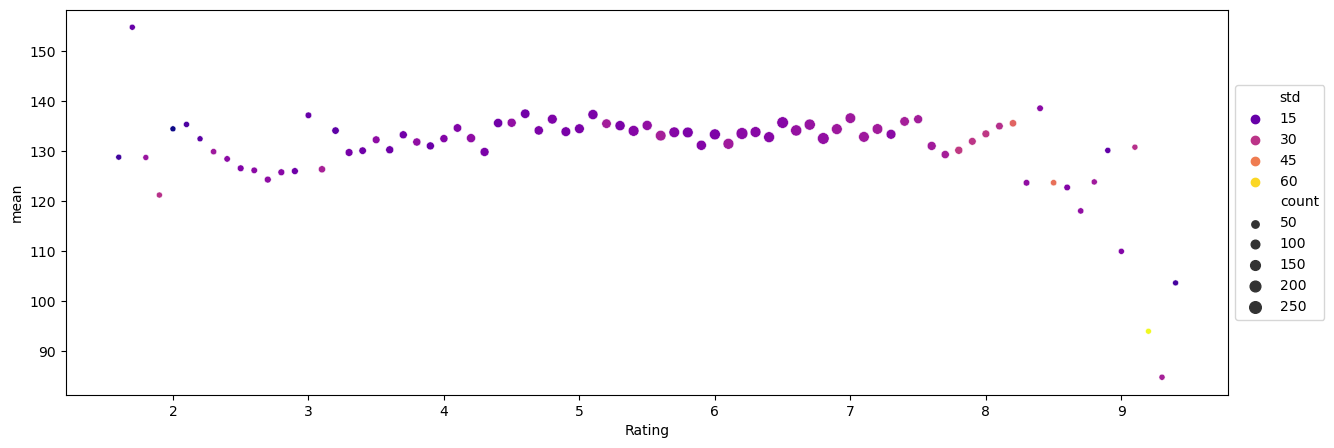

In [55]:
plt.figure(figsize = (15,5))

sns.scatterplot(describe_rt_dr, x = 'Rating', y = 'mean', size = 'count', hue = 'std', palette=palettes[2])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

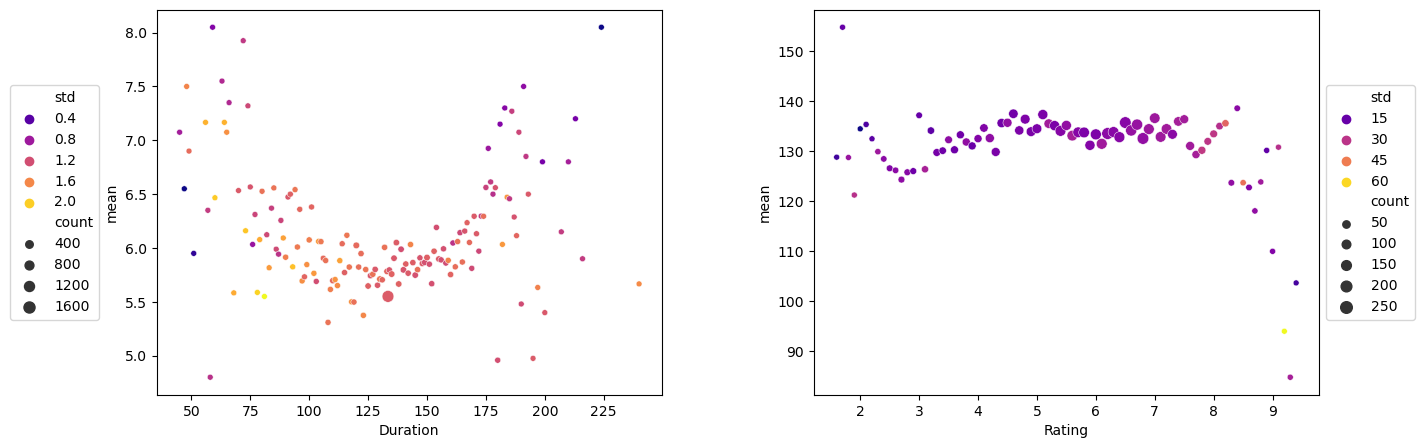

In [56]:
plt.figure(figsize = (15,5))

plt.subplots_adjust(wspace = 0.3)

plt.subplot(121)
sns.scatterplot(describe_dr_rt, x = 'Duration', y = 'mean', size ='count', hue='std', palette = palettes[2])
plt.legend(loc='center right', bbox_to_anchor=(-0.1, 0.5))

plt.subplot(122)
sns.scatterplot(describe_rt_dr, x = 'Rating', y = 'mean', size = 'count', hue = 'std', palette=palettes[2])
plt.legend(loc ='center left', bbox_to_anchor = (1, 0.5))

plt.show()

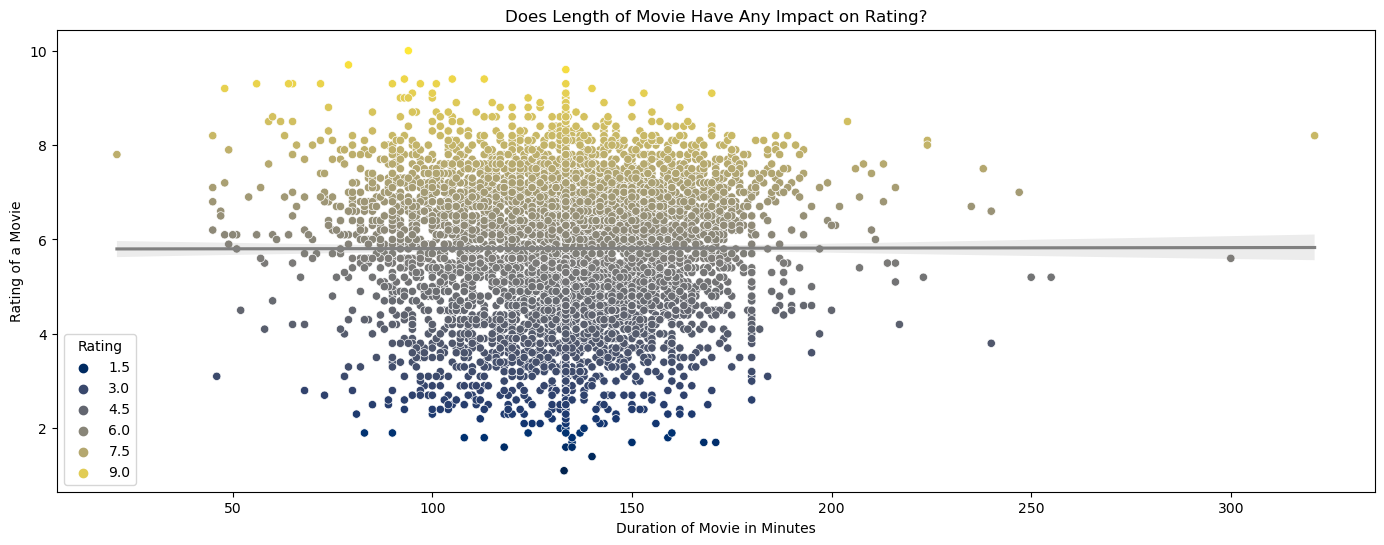

In [57]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=duration_rating, x='Duration', y='Rating', hue='Rating', palette=palettes[8])

# Add the trendline
sns.regplot(data=duration_rating, x='Duration', y='Rating', scatter=False, color='gray')

# Set the title and labels
plt.title('Does Length of Movie Have Any Impact on Rating?')
plt.xlabel('Duration of Movie in Minutes')
plt.ylabel('Rating of a Movie')

# Show the plot
plt.show()


Some key aspect we can extract from this figure are :
- The regression line is relatively flat, with a sligh slop to the downside suggesting a very small and insignificant reverse relationship between the Duration of a movie and its rating.
- As we analysed with the previous figures, the majority of the movies are localed in the 90 - 180 min range.
- 

#### Genre and Year

In [58]:
genre_year = df[ subset := ['Genre', 'Year'] ]
genre_year.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501,7502,7503,7504,7505,7506,7507,7508,7509,7510,7511,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531,7532,7533,7534,7535,7536,7537,7538,7539,7540,7541,7542,7543,7544,7545,7546,7547,7548,7549,7550,7551,7552,7553,7554,7555,7556,7557
Genre,Drama,Comedy,Comedy,Drama,Horror,Action,Drama,Horror,Horror,Comedy,Comedy,Comedy,Crime,Horror,Comedy,Drama,Drama,Drama,Action,Action,Drama,Drama,Horror,Horror,Drama,Horror,Action,Action,Thriller,Comedy,Drama,Comedy,Adventure,Action,Comedy,Action,Crime,Comedy,Thriller,Drama,Sport,Biography,Drama,Drama,Horror,Comedy,Crime,Comedy,Comedy,Drama,Drama,Adventure,Horror,Thriller,Action,Thriller,Comedy,Drama,Action,Crime,Drama,Horror,Horror,Horror,Drama,Drama,Drama,Drama,Thriller,Action,Comedy,Action,Horror,Drama,Comedy,...,Action,Action,Action,Romance,Action,Action,Adventure,Drama,Action,Drama,Family,Drama,Action,Drama,Action,Mystery,Action,Action,Action,Comedy,Drama,Drama,Drama,Comedy,Comedy,Crime,Drama,Comedy,Drama,Drama,Crime,Musical,Action,Drama,Action,Adventure,Drama,Drama,Action,Action,Drama,Drama,Drama,Musical,Drama,Drama,Romance,Comedy,Romance,Drama,Action,Documentary,Comedy,Drama,Drama,Comedy,Romance,Family,Drama,Drama,Drama,Action,Drama,Comedy,Action,Action,Action,Drama,Biography,Action,Action,Action,Action,Action,Action
Year,2019,2019,1997,2005,2012,2014,2004,2016,1991,2012,2018,2010,1958,2021,2017,2009,2005,1993,2002,2014,1946,2004,2008,2016,2012,2018,1994,2007,2019,2017,2014,2013,2012,2003,2014,2018,1998,2017,2018,1979,2019,2002,2008,1974,2014,2012,2003,2019,2009,2009,2018,2015,2004,2016,2015,2009,2006,1981,1974,2020,2019,1985,2013,2019,2011,2016,2009,2012,2012,1974,2007,2011,2014,2007,2005,...,1988,1995,1977,1981,1985,1994,1939,1987,2003,1972,1984,1960,1975,2005,1997,1943,1973,1998,2013,1993,2013,1983,1972,2014,1945,2005,1974,2018,1987,1994,2014,1964,1997,1948,2013,1958,1960,1990,2006,1975,1986,1986,2006,1964,1940,1976,2000,2013,1961,1965,1992,1988,2013,1984,2002,2011,2012,2019,1958,2000,1972,2011,2018,2009,1998,1996,1975,2015,2001,1985,1992,1989,1988,1999,1998


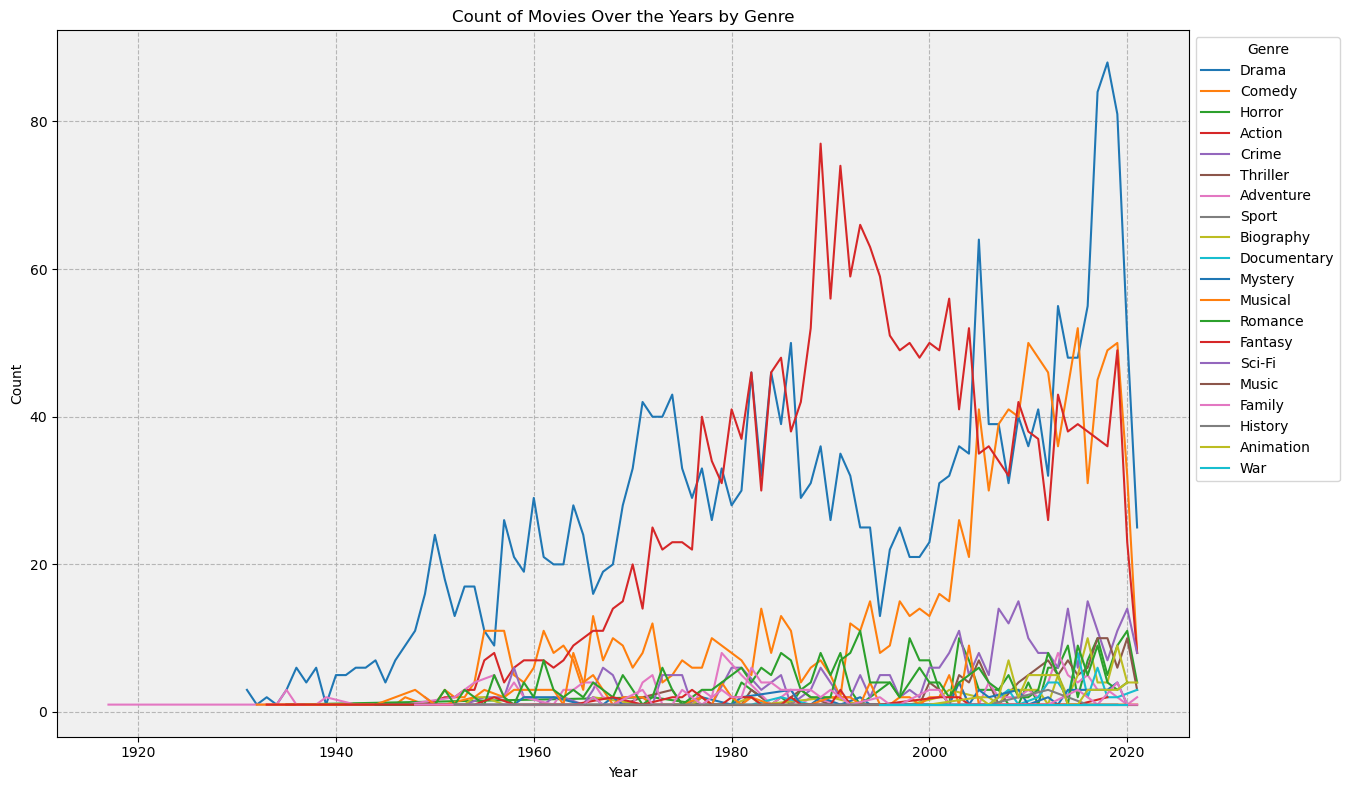

In [59]:
def plot_genre_year(dataset):
    genre_list = dataset['Genre'].unique()

    plt.figure(figsize=(16, 8))


    for genre in genre_list:
        genre_df = dataset[dataset['Genre'] == genre].groupby('Year').describe()
        genre_df = genre_df['Genre']  # Accessing the 'Genre' column after groupby
        
        # Plotting the number of movies throughout the year per genre
        sns.lineplot(data=genre_df, x='Year', y='count', label=genre, linestyle='-')
    
    plt.title('Count of Movies Over the Years by Genre')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.9)  # Add gridlines with transparency
    
    # Customize legend
    plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Adjust layout to make room for legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    # Add background color
    plt.gca().set_facecolor('#f0f0f0')

    plt.show()

plot_genre_year(genre_year)


##### Statistics for seperate movie's genre in the dataset

In [60]:
describe_genre_year = genre_year.groupby('Genre').describe()['Year']
display(describe_genre_year.T)

Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War
count,2272.000000,156.000000,45.000000,97.000000,1178.000000,342.000000,49.000000,2481.000000,80.000000,52.000000,13.000000,183.000000,4.000000,120.000000,75.000000,271.000000,5.000000,2.0,130.000000,3.000000
mean,1993.744278,1983.788462,2012.088889,2000.154639,1999.556876,1998.029240,2010.163265,1989.531640,1987.575000,1980.326923,1992.076923,2003.377049,2001.750000,1978.583333,1991.666667,1988.859779,2005.200000,2019.0,2005.692308,2011.333333
std,15.354929,25.775460,4.818630,23.176560,19.182766,19.109939,10.573841,22.320627,17.608093,20.584328,23.925097,13.360386,28.744565,20.086612,22.276720,19.975417,22.196847,0.0,15.065154,14.153916
min,1935.000000,1917.000000,2000.000000,1937.000000,1933.000000,1949.000000,1979.000000,1931.000000,1948.000000,1933.000000,1952.000000,1935.000000,1959.000000,1932.000000,1941.000000,1944.000000,1966.000000,2019.0,1960.000000,1995.000000
25%,1984.000000,1964.000000,2008.000000,1983.000000,1989.000000,1985.000000,2008.000000,1973.000000,1976.500000,1967.000000,1977.000000,1992.500000,1998.750000,1964.000000,1972.000000,1973.000000,2012.000000,2019.0,2001.000000,2007.000000
50%,1994.000000,1981.000000,2012.000000,2011.000000,2007.000000,2005.000000,2014.000000,1990.000000,1984.000000,1980.000000,2002.000000,2004.000000,2013.500000,1976.000000,1997.000000,1991.000000,2013.000000,2019.0,2012.000000,2019.000000
75%,2005.000000,2010.250000,2016.000000,2017.000000,2014.000000,2013.750000,2017.000000,2010.000000,2000.000000,1992.750000,2012.000000,2015.500000,2016.500000,1997.250000,2012.000000,2005.000000,2014.000000,2019.0,2017.000000,2019.500000
max,2021.000000,2021.000000,2020.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2018.000000,2019.000000,2021.000000,2021.000000,2021.000000,2020.000000,2020.000000,2021.000000,2019.0,2021.000000,2020.000000


Let's consider the genres 'Action', 'Adventure', and 'Animation' from the table:

1. **Action**:
   - **Count**: There are 2299 action movies in the dataset.
   - **Mean**: The average year of action movies is approximately 1993.79.
   - **Std**: The standard deviation of years for action movies is around 15.32, indicating a moderate spread around the mean.
   - **Min**: The earliest action movie in the dataset is from 1935.
   - **25%**: 25% of action movies were released before 1984.
   - **50% (Median)**: Half of the action movies were released before 1994.
   - **75%**: 75% of action movies were released before 2005.
   - **Max**: The latest action movie in the dataset is from 2021.

2. **Adventure**:
   - **Count**: There are 158 adventure movies in the dataset.
   - **Mean**: The average year of adventure movies is approximately 1983.79.
   - **Std**: The standard deviation of years for adventure movies is around 25.86, indicating a relatively high spread around the mean.
   - **Min**: The earliest adventure movie in the dataset is from 1917.
   - **25%**: 25% of adventure movies were released before 1964.
   - **50% (Median)**: Half of the adventure movies were released before 1981.
   - **75%**: 75% of adventure movies were released before 2010.75.
   - **Max**: The latest adventure movie in the dataset is from 2021.

3. **Animation**:
   - **Count**: There are 52 animation movies in the dataset.
   - **Mean**: The average year of animation movies is approximately 2012.29.
   - **Std**: The standard deviation of years for animation movies is around 4.68, indicating a relatively low spread around the mean.
   - **Min**: The earliest animation movie in the dataset is from 2000.
   - **25%**: 25% of animation movies were released before 2008.
   - **50% (Median)**: Half of the animation movies were released before 2012.
   - **75%**: 75% of animation movies were released before 2016.
   - **Max**: The latest animation movie in the dataset is from 2020.

These statistics provide insights into the distribution and variability of movie release years within each genre.
Based on the graph above, we notice the the `Drama` genre has been the most dominant in the film industry in India, which has seen constant increase in the number of movies produced, followed `Action` genre, even tho it has seen a signifiacnt decrease in the last 10 year followed by the raise of `Comedy` movies.

### Correlation : 

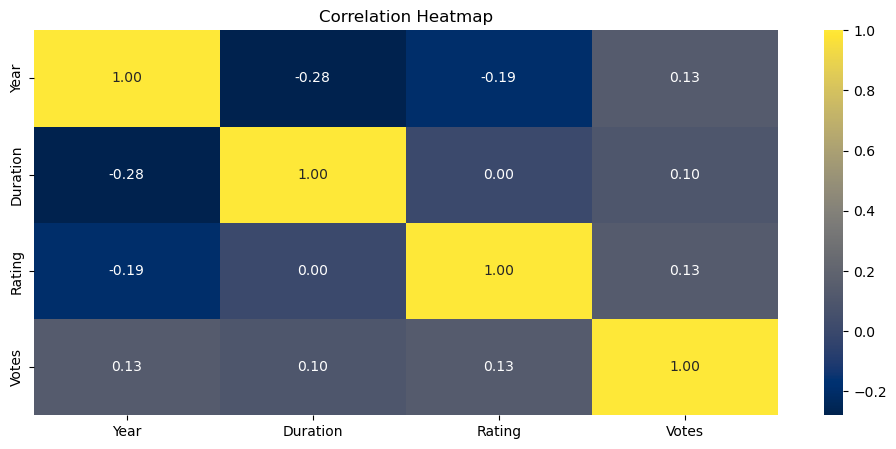

In [61]:
# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=palettes[8], fmt=".2f")
heatmap.set_title('Correlation Heatmap')

plt.show()

/home/imad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


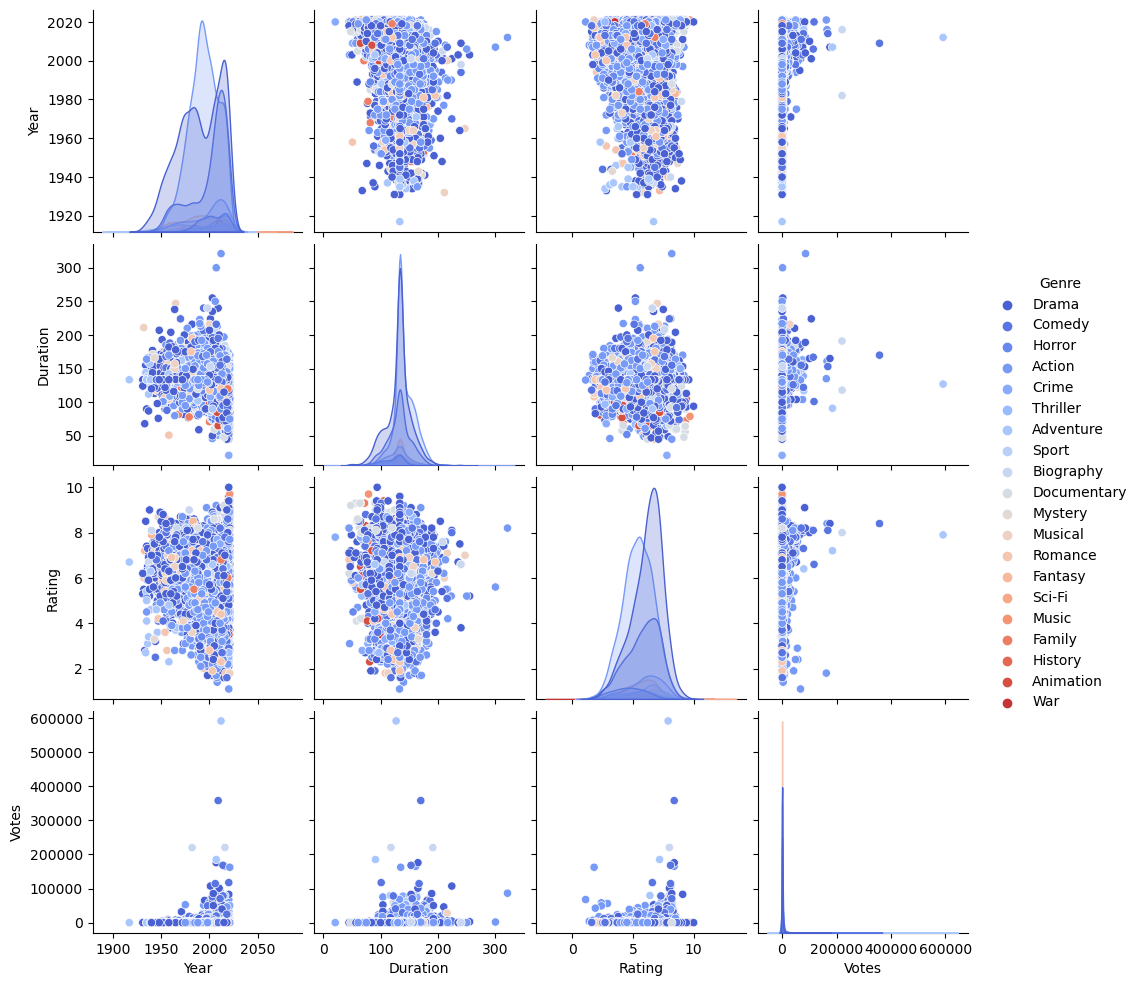

In [62]:
relationship_matrix = sns.pairplot(df, hue='Genre', corner=False, kind='scatter', palette=palettes[7])

## Model Building

### Dataprocessing

In [63]:
# making sure to delete the name column since it wont influence the prediction
df.drop('Name', axis = 1 , inplace = True)

In [64]:
# converting categorical entries into numerical data
genre_map = {}
for i, genre in enumerate(df['Genre'].unique()):
    genre_map[genre] = i
    
print(genre_map)

{'Drama': 0, 'Comedy': 1, 'Horror': 2, 'Action': 3, 'Crime': 4, 'Thriller': 5, 'Adventure': 6, 'Sport': 7, 'Biography': 8, 'Documentary': 9, 'Mystery': 10, 'Musical': 11, 'Romance': 12, 'Fantasy': 13, 'Sci-Fi': 14, 'Music': 15, 'Family': 16, 'History': 17, 'Animation': 18, 'War': 19}


In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# dictionary to store mappings
encoded_mappings = {}

columns_to_encode = ['Genre', 'Director', 'Actor 1']

for column in columns_to_encode:
    # Fit and transform the column to numerical values
    df[column] = label_encoder.fit_transform(df[column])
    
    unique_labels = label_encoder.classes_
    
    # Create a dictionary to map numerical values to labels
    mapping = {i: label for i, label in enumerate(unique_labels)}
    
    # Add the mapping to the dictionary of mappings
    encoded_mappings[column] = mapping

# Now encoded_mappings contains a dictionary for each encoded column
# print(encoded_mappings) # This will print out a large set of mapped values, so dont activate it unless you want to visualise them at whole.

In [66]:
df['Genre_mean_rating'] = df.groupby('Genre')['Rating'].transform('mean')

df['Director_encoded'] =df.groupby('Director')['Rating'].transform('mean')

df['Actor1_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

df['Actor2_encoded'] = df.groupby('Actor 2')['Rating'].transform('mean')

df['Actor3_encoded'] = df.groupby('Actor 3')['Rating'].transform('mean')

In [67]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
Y = df['Rating']

### Splitting the dataset into training and test set

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

In [69]:
# Reviewing our splitting data:
print('training dataset')
display(X_train.T)

print('\n\ntesting dataset')
display(X_test.T)

print('\n\nThe target training dataset')
display(Y_train.T)

print('\n\nThe target testing dataset')
display(Y_test.T)

training dataset


,746,5345,5708,3968,2182,5776,3837,2673,6328,4634,2746,6419,259,4710,5518,380,5040,5304,1922,599,45,4922,5140,7292,2110,4149,4125,7232,1928,3317,6483,7438,5841,4622,4570,4173,2549,3250,6613,1298,426,1652,805,1992,410,6662,665,438,4979,2571,434,751,1575,6554,4716,5483,2018,5112,3504,1049,626,4857,1223,210,6264,6443,110,51,1499,1109,3901,3206,2997,2662,6062,...,775,2556,1478,7099,5486,6235,1363,7041,2612,2824,2041,241,2061,2363,600,2435,5393,6310,2888,6164,646,3890,3556,3202,1528,6975,1267,1899,4658,3005,2734,7101,189,1806,975,2747,2047,2558,1082,474,2904,4843,6396,4117,3385,4555,1184,6420,5051,5311,2433,6949,5611,2391,769,7476,1685,130,2919,3171,3444,6231,5578,4426,5334,466,6265,5734,3092,3772,5191,5226,5390,860,7270
Year,1988.000000,2017.000000,1980.000000,2000.000000,1986.000000,2018.000000,2010.000000,1979.000000,2000.000000,1957.000000,2005.000000,2018.000000,1997.000000,2020.000000,1981.000000,1977.000000,2005.000000,1984.000000,2018.000000,2016.000000,2012.000000,2007.000000,1985.000000,2013.000000,1967.000000,1991.000000,1982.000000,1986.000000,1979.000000,2012.000000,2014.000000,2019.000000,2016.000000,1975.000000,2013.000000,2001.000000,2012.000000,1990.000000,1985.000000,1971.000000,1958.000000,2019.000000,2003.000000,1966.000000,2003.000000,1980.000000,1974.000000,1965.000000,1995.000000,2016.000000,2013.000000,1978.000000,1979.000000,2005.000000,2007.000000,1998.000000,1974.000000,2003.000000,2004.000000,1980.000000,1994.000000,1957.000000,2015.000000,2012.000000,1974.000000,1982.000000,1994.000000,2015.000000,1961.000000,1947.000000,2005.000000,1963.000000,1971.000000,1995.000000,1964.000000,...,1955.000000,1997.000000,2002.000000,1974.000000,1970.000000,2012.000000,1997.000000,2003.000000,1993.000000,2008.000000,1969.000000,1970.000000,1983.000000,2010.000000,2016.000000,1979.000000,1964.000000,1964.000000,2020.000000,1966.000000,1982.000000,1977.000000,2012.000000,2017.000000,1969.000000,1992.000000,2003.000000,1968.000000,2008.000000,2006.000000,1954.000000,1994.000000,1985.000000,2009.000000,2015.000000,2017.000000,1978.000000,1960.000000,2018.000000,2020.00,2016.000000,2010.000000,2020.000000,2020.00,2005.000000,1977.000000,1974.000000,2002.000000,2011.000000,2015.000000,2017.000000,1977.000000,2016.000000,2014.000000,1969.000000,1984.000000,1993.000000,2009.000000,1995.000000,1990.000000,1991.000000,2018.000000,2013.000000,1971.000000,1991.000000,1954.000000,1990.000000,1985.000000,2018.000000,2000.000000,1996.000000,1989.000000,1995.000000,1989.000000,2016.000000
Votes,16.000000,189.000000,475.000000,887.000000,18.000000,23.000000,100.000000,8.000000,28.000000,27.000000,796.000000,168.000000,230.000000,33.000000,77.000000,84.000000,11195.000000,30.000000,417.000000,43.000000,165.000000,1373.000000,138.000000,936.000000,40.000000,1267.000000,12.000000,5.000000,29.000000,31.000000,980.000000,500.000000,2006.000000,1272.000000,26.000000,1567.000000,225.000000,19.000000,16.000000,244.000000,11.000000,15817.000000,8.000000,92.000000,7.000000,36.000000,6.000000,32.000000,483.000000,184.000000,1857.000000,64.000000,33.000000,35.000000,2180.000000,12.000000,5.000000,241.000000,9.000000,11.000000,124.000000,6.000000,23.000000,26.000000,29.000000,14.000000,115.000000,6.000000,24.000000,7.000000,232.000000,26.000000,39.000000,40.000000,50.000000,...,136.000000,1120.000000,187.000000,10.000000,9.000000,15659.000000,12575.000000,370.000000,326.000000,1981.000000,59.000000,24.000000,15.000000,261.000000,14.000000,6.000000,42.000000,13.000000,18.000000,55.000000,22.000000,197.000000,59060.000000,19349.000000,48.000000,7.000000,1361.000000,20.000000,10.000000,118.000000,21.000000,7.000000,158.000000,29283.000000,149.000000,131.000000,11591.000000,27.000000,84.000000,384.00,2009.000000,101014.000000,8208.000000,12.00,646.000000,10.000000,54.000000,66.000000,694.000000,8714.000000,89.000000,19.000000,1784.000000,14.000000,104.000000,25.000000,3185.000000,62.000000,416.000000,5.000000,11.000000,7.000000,5552.000000,61.000000,1



testing dataset


,3148,1662,3078,3012,3332,4905,3931,7100,2874,1730,5574,3783,1515,2691,1803,5655,6111,1168,6615,2614,23,7011,5484,5381,1197,3538,3433,1302,970,2107,5858,1876,4510,4660,496,319,7551,6247,1721,4080,3767,4652,2742,7305,3861,6519,4075,2943,1563,1352,3844,2036,65,2245,866,5425,5551,4874,132,5649,332,2647,2963,2087,5377,2142,4376,3213,4594,3833,4180,3131,5899,6176,960,...,1210,1793,4824,2977,1436,5213,6003,376,5155,755,291,5113,6945,188,3002,1201,4184,2842,5242,4328,501,7428,4071,3353,3541,4397,5952,6998,672,4935,7465,6594,7170,5890,1582,5221,5924,1192,2210,4168,216,4334,5108,421,505,5006,6555,4267,6656,506,2398,3992,6658,5476,1703,4868,1586,5017,3217,3128,6504,4828,4606,347,6672,333,4546,4649,1643,2955,6612,5823,7080,3896,6955
Year,1969.000000,1975.000000,1974.000000,2015.000000,1949.000000,1996.000000,1993.000000,2019.000000,1989.000000,1972.000000,2009.000000,1986.000000,2014.000000,2002.000000,2009.000000,1995.000000,1999.000000,2020.00000,1989.000000,2001.000000,2016.00000,2016.000000,1970.000000,1958.000000,2011.000000,2006.000000,1947.000000,2020.000000,1960.000000,1958.000000,2015.00,2008.000000,1973.000000,2008.000000,2020.000000,2004.000000,2001.000000,2011.000000,1970.000000,2000.000000,1991.000000,2016.000000,2019.000000,2015.000000,1963.000000,2005.000000,1985.000000,1984.000000,2020.000000,2003.000000,1992.000000,1972.000000,2016.000000,1969.000000,1993.000000,1971.000000,1985.000000,1991.000000,2016.000000,2005.000000,1970.000000,1976.000000,1965.000000,1977.000000,2019.000000,1976.000000,1973.000000,2013.000000,1985.000000,1992.000000,2012.000000,2010.000000,2009.000000,2006.000000,2013.000000,...,2017.000000,2002.000000,1995.000000,2011.000000,1957.000000,1972.000000,1975.000000,2014.000000,2020.000000,1986.000000,1966.000000,2012.000000,2017.000000,2000.000000,1966.000000,1999.000000,1981.000000,2012.000000,1993.000000,2003.000000,1990.000000,1996.000000,2018.000000,2003.000000,2011.000000,1979.000000,1989.000000,1937.000000,1994.000000,1992.000000,1985.000000,2019.000000,2000.000000,2012.000000,2010.000000,1998.000000,2016.000000,1982.000000,1981.000000,1984.000000,1967.000000,1989.000000,1977.000000,1974.000000,1985.000000,2017.000000,2000.000000,1958.000000,2003.000000,2013.000000,2018.000000,2011.000000,1981.000000,1986.000000,1964.000000,1991.000000,2012.000000,1993.000000,1977.000000,2003.000000,1983.000000,2018.00,1989.000000,1976.000000,2014.000000,1986.000000,1970.000000,2016.000000,1989.000000,1980.000000,2014.000000,1983.000000,1977.000000,1960.000000,2008.000000
Votes,985.000000,7.000000,13.000000,23.000000,30.000000,51.000000,31.000000,4944.000000,33.000000,122.000000,802.000000,13.000000,879.000000,11.000000,76.000000,751.000000,24454.000000,4236.00000,43.000000,85.000000,1559.00000,2478.000000,8.000000,8.000000,255.000000,3181.000000,81.000000,10143.000000,8.000000,5.000000,31.00,87.000000,6.000000,1934.000000,25.000000,1494.000000,1496.000000,39.000000,37.000000,7.000000,6.000000,74.000000,13.000000,185.000000,46.000000,59.000000,27.000000,18.000000,7.000000,17.000000,17.000000,8.000000,9.000000,207.000000,14.000000,27.000000,70.000000,21.000000,266.000000,66.000000,70.000000,14.000000,22.000000,186.000000,5954.000000,104.000000,129.000000,721.000000,1210.000000,1879.000000,10.000000,10075.000000,21.000000,856.000000,140.000000,...,11.000000,50.000000,2773.000000,291.000000,20.000000,10.000000,62.000000,43.000000,10.000000,44.000000,32.000000,25.000000,11.000000,5.000000,14.000000,148.000000,377.000000,4132.000000,17.000000,4401.000000,18.000000,1214.000000,7.000000,1976.000000,88.000000,289.000000,10.000000,11.000000,50.000000,9.000000,101.000000,23000.000000,706.000000,837.000000,317.000000,392.000000,760.000000,53.000000,136.000000,16.000000,81.000000,68.000000,23.000000,174.000000,11.000000,17734.000000,44.000000,1273.000000,51.000000,16.000000,783.000000,56.000000,12.000000,830.000000,10.000000,11.000000,13486.000000,32.000000,46.000000,3937.000000,196.000000,258.00,16.000000,284.000000,308.000



The target training dataset


746     4.2
5345    6.0
5708    6.3
3968    5.1
2182    6.6
       ... 
5191    4.6
5226    7.2
5390    5.0
860     6.0
7270    4.4
Name: Rating, Length: 6046, dtype: float64



The target testing dataset


3148    7.4
1662    4.9
3078    6.5
3012    5.7
3332    7.0
       ... 
6612    6.3
5823    6.3
7080    7.2
3896    6.8
6955    4.9
Name: Rating, Length: 1512, dtype: float64

### Model training

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'K Neighbors Regressor': KNeighborsRegressor()
}

In [82]:
# Evaluating the performance of trained algos
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# print('The performance evaluation of Logistic Regression is below: ', '\n')
# print('Mean squared error: ',mean_squared_error(Y_test, lin_reg_pred))
# print('Mean absolute error: ',mean_absolute_error(Y_test, lin_reg_pred))
# print('R2 score: ',r2_score(Y_test, lin_reg_pred))
# print('\n', '='*100, '\n')

# print('The performance evaluation of RandomForestRegressor is below: ', '\n')
# print('Mean squared error: ',mean_squared_error(Y_test, Rnd_forest_reg_pred))
# print('Mean absolute error: ',mean_absolute_error(Y_test, Rnd_forest_reg_pred))
# print('R2 score: ',r2_score(Y_test, Rnd_forest_reg_pred))
# print('\n', '='*100, '\n')

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Evaluate performance
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    
    # Print results
    print(f'The performance evaluation of {name} is below:')
    print('Mean squared error:', mse)
    print('Mean absolute error:', mae)
    print('R2 score:', r2)
    print('='*100)


The performance evaluation of Linear Regression is below:
Mean squared error: 0.4526232741878055
Mean absolute error: 0.5024168389864659
R2 score: 0.7557134388275794
The performance evaluation of Random Forest Regressor is below:
Mean squared error: 0.375423609126984
Mean absolute error: 0.4237546296296298
R2 score: 0.7973790839166688
The performance evaluation of K Neighbors Regressor is below:
Mean squared error: 1.2788367724867726
Mean absolute error: 0.8641931216931218
R2 score: 0.30979546287757453


### Testing our models

In [83]:
X.sample()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
682,2012,1534.0,96.0,5.96,6.8,6.8,6.9,6.8


In [84]:
new_entry = {
    'Year': [2012],
    'Votes': [1532],
    'Duration': [95],
    'Genre_mean_rating': [5.350217],
    'Director_encoded': [6.52],
    'Actor1_encoded': [6.0],
    'Actor2_encoded': [7.0],
    'Actor3_encoded': [6.8]
}
new_entry = pd.DataFrame(new_entry)

In [85]:
# Predict the movie rating
lin_reg_predicted_rating = models['Linear Regression'].predict(new_entry)
Rnd_forest_reg_predicted_rating = models['Random Forest Regressor'].predict(new_entry)
KNeighbors_Regressor_predicted_rating = models['K Neighbors Regressor'].predict(new_entry)

# Display the predicted rating
print("Linear regression Predicted Rating:", lin_reg_predicted_rating[0])
print("RandomForestRegressor predicted Rating : ", Rnd_forest_reg_predicted_rating[0])
print("K Neighbors Regressor predicted Rating : ", KNeighbors_Regressor_predicted_rating[0])


Linear regression Predicted Rating: 6.697033877448336
RandomForestRegressor predicted Rating :  6.909999999999997
K Neighbors Regressor predicted Rating :  7.3


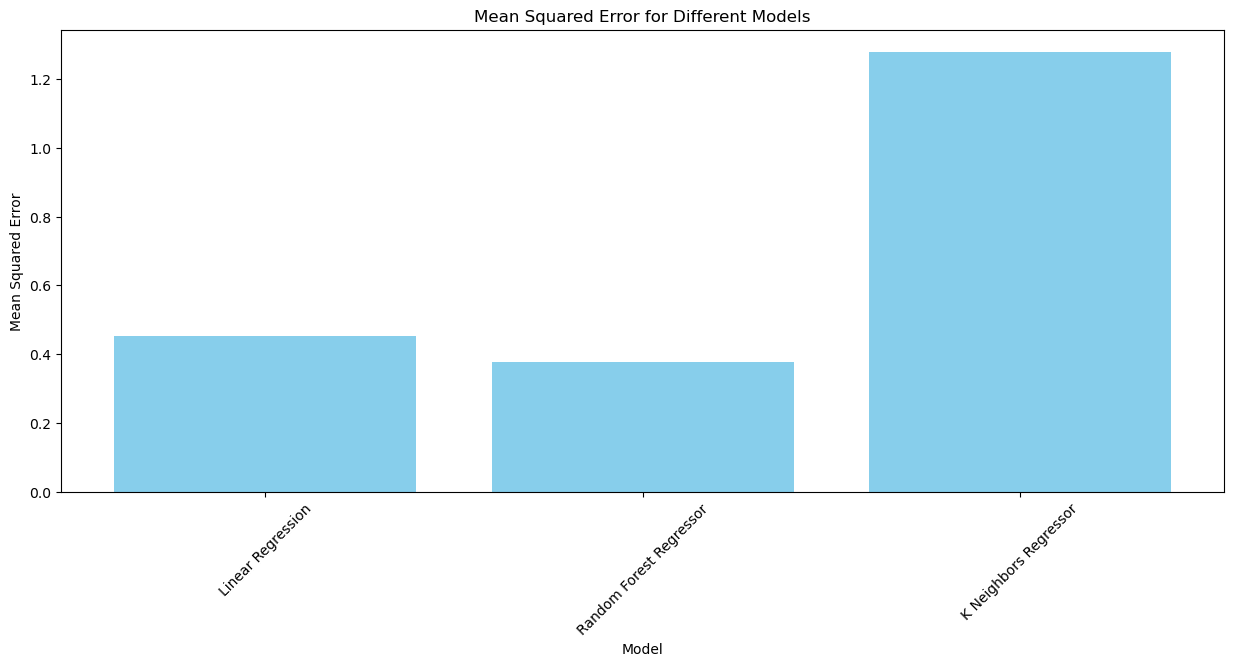

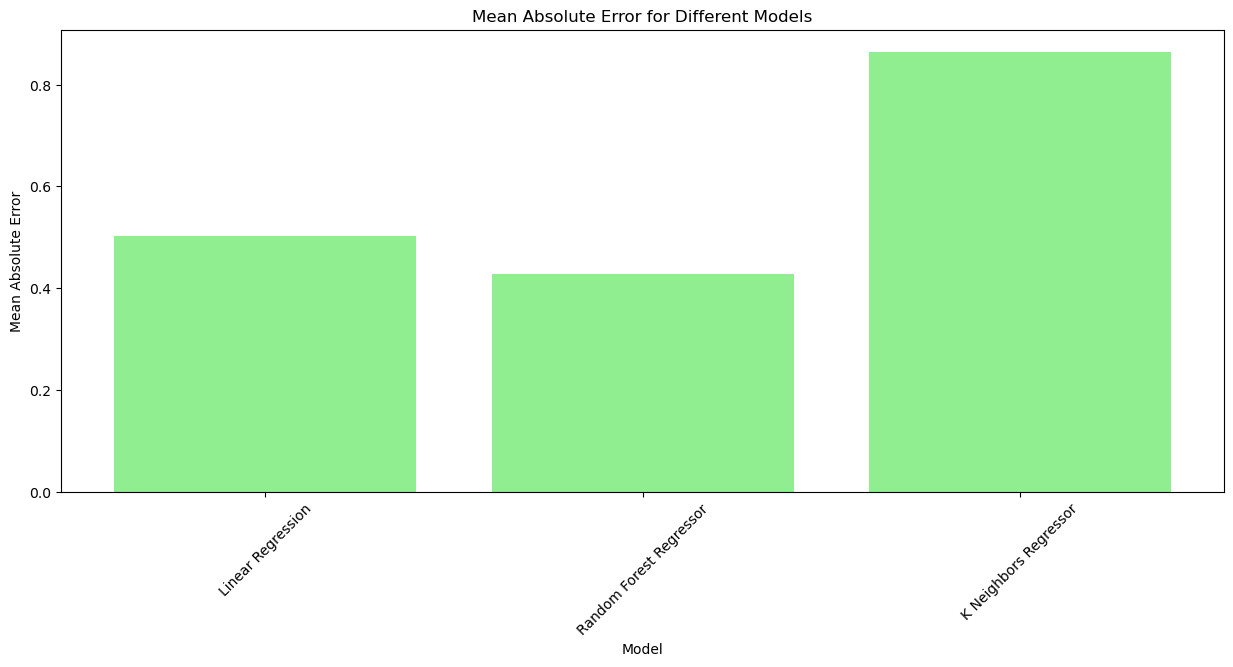

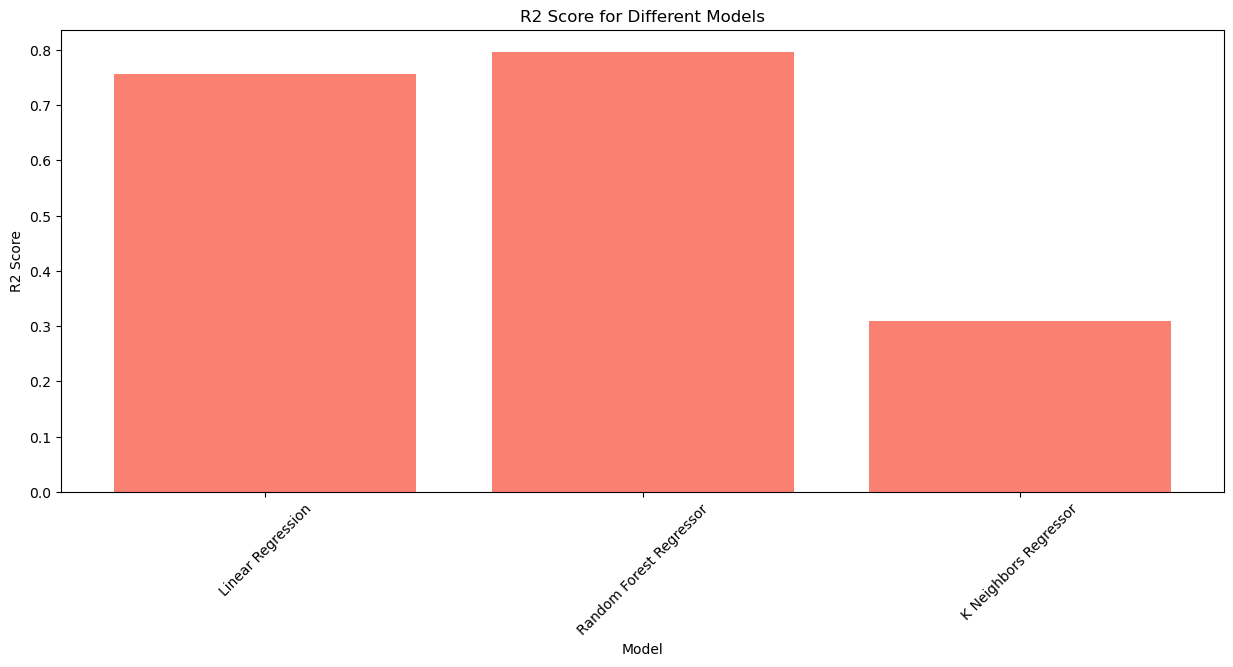

In [88]:
import matplotlib.pyplot as plt

# Define dictionaries to store metrics for each model
mse_scores = {}
mae_scores = {}
r2_scores = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    
    # Store metrics in dictionaries
    mse_scores[name] = mse
    mae_scores[name] = mae
    r2_scores[name] = r2

# Plot Mean Squared Error
plt.figure(figsize=(15, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color='skyblue')
plt.title('Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot Mean Absolute Error
plt.figure(figsize=(15, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color='lightgreen')
plt.title('Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()

# Plot R2 Score
plt.figure(figsize=(15, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='salmon')
plt.title('R2 Score for Different Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()
